## Task 2: Training, validating and developing a Machine Learning pipeline using PyCaret

**Name:** Lock Yan Fong, Brendon

**Admin No.:** 230739G

In this notebook, we will be training, validating, and developing a ML pipeline using PyCaret. To recap from Task 1, the dataset I will be using is Heart Failure Prediction Dataset and the target variable is Heart Disease. It is a classification task where the target variable is binary. 

To start, I would like to address that I will be using the modified version of the dataset since some light data preparation was done during exploratory data analysis. First, I will be importing some necessary libraries and ingest the dataset, displaying the first 5 records.


In [6]:
# Import necessary libraries and set
import pandas as pd 
from pycaret.classification import *

df = pd.read_csv('heart_modified.csv')
df.head()

,Age,Gender,ChestPainType,RestingDiastolicBP,CholesterolTotal,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Cleansing & Transformation

Next, I will be setting up my PyCaret implementation, by using setup function, which takes in two required parameters, data and target. This function is also responsible for all the data cleansing and transformation tasks required before model training.

I will also be enabling experiment logging during the training so that the models get registered with MLFlow. I will give the experiment name as 'Heart_Disease_Prediction' to be descriptive with the prediction I am making.

In [11]:
# Initialise the PyCaret implementation using setup function
from pycaret.classification import setup
s = setup(
    data=df,
    target="HeartDisease",
    
    # Train/validation split + CV
    session_id=123,
    data_split_stratify=True,  # good for classification
    
    # Scaling / Normalisation
    normalize=True,
    normalize_method="zscore",  
    
    # Imputation
    numeric_imputation="median",
    categorical_imputation="mode",
    
    # Feature engineering (automatic) 
    polynomial_features=True,
    
    # Binning continuous variables into intervals 
    bin_numeric_features=["Age", "CholesterolTotal", "RestingDiastolicBP", "Oldpeak"],
    
    # Helpful extras 
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    
    # Experiment logging (MLflow)
    log_experiment=True,
    experiment_name="Heart_Disease_Prediction",
    log_plots=True,   # logs plots to MLflow automatically
)


,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 133)"
5,Transformed train set shape,"(642, 133)"
6,Transformed test set shape,"(276, 133)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


2026/01/30 17:55:46 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_Prediction' does not exist. Creating a new experiment.


In [12]:
# Look at the transformed dataset
s.get_config('dataset_transformed')

,Age,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age Gender,Age ChestPainType_ATA,Age ChestPainType_ASY,Age ChestPainType_NAP,Age ChestPainType_TA,...,ExerciseAngina ST_Slope_Down,ExerciseAngina ST_Slope_Flat,Oldpeak^2,Oldpeak ST_Slope_Up,Oldpeak ST_Slope_Down,Oldpeak ST_Slope_Flat,ST_Slope_Up ST_Slope_Down,ST_Slope_Up ST_Slope_Flat,ST_Slope_Down ST_Slope_Flat,HeartDisease
0,-1.815395,-0.554559,1.371880,-0.827671,-0.833748,-0.102996,1.526026,-1.052009,-0.524519,-0.219323,...,-0.221404,-0.648347,-0.565322,-0.297454,-0.229978,-0.643223,0.0,0.0,0.0,0
462,0.867990,-0.554559,-0.823004,1.208209,0.612917,0.704941,-0.474502,1.048349,-0.524519,-0.219323,...,4.516636,-0.648347,-0.071467,-0.297454,1.716670,-0.643223,0.0,0.0,0.0,1
853,-0.920934,-0.554559,0.733368,-0.827671,-0.833748,0.194665,-0.474502,-1.052009,1.557958,-0.219323,...,-0.221404,-0.648347,-0.565322,-0.297454,-0.229978,-0.643223,0.0,0.0,0.0,0
540,0.867990,-0.554559,-0.623469,1.208209,0.612917,0.832510,-0.474502,-1.052009,2.222578,-0.219323,...,-0.221404,1.542384,-0.144522,-0.297454,-0.229978,0.650275,0.0,0.0,0.0,1
162,-0.920934,-0.554559,1.451694,-0.827671,-0.833748,0.194665,1.876118,-1.052009,-0.524519,-0.219323,...,-0.221404,-0.648347,-0.565322,-0.297454,-0.229978,-0.643223,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.026472,-0.554559,-0.623469,1.208209,0.612917,0.577372,-0.474502,0.941552,-0.524519,-0.219323,...,-0.221404,1.542384,0.603566,-0.297454,-0.229978,1.512607,0.0,0.0,0.0,1
486,-0.026472,1.803235,1.691136,-0.827671,-0.833748,0.534849,2.276224,-1.052009,-0.524519,-0.219323,...,-0.221404,-0.648347,-0.518567,0.540115,-0.229978,-0.643223,0.0,0.0,0.0,0
859,-0.026472,-0.554559,0.174671,-0.827671,0.612917,-1.803915,-0.474502,-1.052009,1.735190,-0.219323,...,-0.221404,-0.648347,0.092177,2.843430,-0.229978,-0.643223,0.0,0.0,0.0,0
334,-0.026472,1.803235,1.292066,-0.827671,-2.280413,0.364757,-0.474502,0.763555,-0.524519,-0.219323,...,-0.221404,-0.648347,-0.422134,-1.763200,-0.229978,-0.643223,0.0,0.0,0.0,1


**Note:** Although age appears as negative values in the transformed dataset, this is expected due to z-score normalization applied during preprocessing. Age was intentionally treated as a continuous numerical variable rather than a categorical feature, as its ordinal nature and relative distances carry predictive information for heart disease risk. The normalization ensures that age contributes proportionally to model learning without dominating other features.

## Model Training and Evaluation

The compare_models function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. We will be using this function to train and compare the performance of the classfication models and retrieve the best one.

In [13]:
best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8770,0.9296,0.9042,0.8799,0.8908,0.7501,0.7528,2.9750
gbc,Gradient Boosting Classifier,0.8661,0.9200,0.8819,0.8802,0.8795,0.7288,0.7320,0.2270
lightgbm,Light Gradient Boosting Machine,0.8644,0.9201,0.8927,0.8675,0.8793,0.7248,0.7265,0.2070
xgboost,Extreme Gradient Boosting,0.8629,0.9163,0.8871,0.8697,0.8773,0.7219,0.7243,0.1620
rf,Random Forest Classifier,0.8614,0.9218,0.8899,0.8658,0.8768,0.7184,0.7207,0.1560
ada,Ada Boost Classifier,0.8550,0.9169,0.8701,0.8713,0.8693,0.7063,0.7094,0.1690
nb,Naive Bayes,0.8443,0.8912,0.8732,0.8501,0.8606,0.6841,0.6864,0.0820
knn,K Neighbors Classifier,0.8395,0.8981,0.8480,0.8635,0.8541,0.6756,0.6788,0.0740
ridge,Ridge Classifier,0.8395,0.9073,0.8505,0.8605,0.8541,0.6757,0.6782,0.0820
et,Extra Trees Classifier,0.8365,0.9135,0.8590,0.8499,0.8535,0.6686,0.6705,0.1470


2026/01/30 18:06:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/01/30 18:06:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/01/30 18:06:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/01/30 18:06:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/01/30 18:06:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2026/01/30 18:06:07 

Since we do not particularly need MLFlow signature or input example, we can ignore the warning. Based on the cross-validated results, the **CatBoost Classifier** emerged as the **best-performing model**, using **F1-score** as the **primary evaluation metric**. F1-score is prioritised as it balances precision and recall, making it particularly suitable for this heart disease classification task where both false positives and false negatives carry meaningful consequences. CatBoost achieved the highest F1-score (0.8908), alongside strong accuracy (0.8770) and the highest AUC (0.9296), indicating robust overall discrimination capability. While other ensemble models such as Gradient Boosting, LightGBM, and XGBoost also performed competitively, they slightly underperformed CatBoost in terms of balanced predictive performance. These results suggest that CatBoost’s handling of complex feature interactions and categorical encodings contributes to superior and more stable classification outcomes, justifying its selection for further tuning and deployment.

**Note:** The overall rationale to use f1-score as primary metric instead of accuracy was because: Accuracy can be misleading in the presence of class imbalance (shown from Task 1, heart disease 55% vs no heart disease 45% (~92 difference in no. of records), whereas F1-score accounts for both false positives and false negatives.

## Analyse the performance of the best trained model using plot_model function

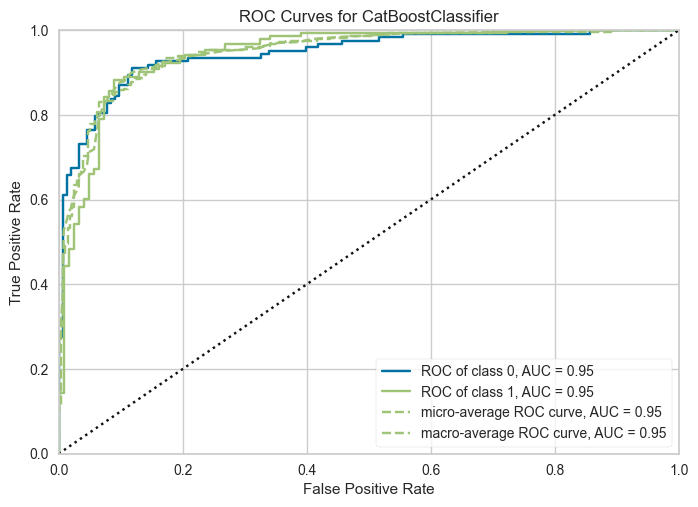

In [15]:
plot_model(best_model, plot="auc")    # ROC AUC


The ROC–AUC curve above for the selected CatBoost classifier demonstrates strong discriminatory performance, with an AUC of approximately 0.95 for both classes as well as for the macro- and micro-averaged curves. The curves remain well above the diagonal reference line, indicating that the model consistently achieves high true positive rates *(how many heart disease cases are correctly detected)* across a wide range of false positive *(how often healthy cases are incorrectly flagged)* rates. This suggests that the model is effective at distinguishing between patients with and without heart disease, independent of any specific classification threshold. Overall, the high AUC value confirms the robustness and generalisation capability of the selected model.

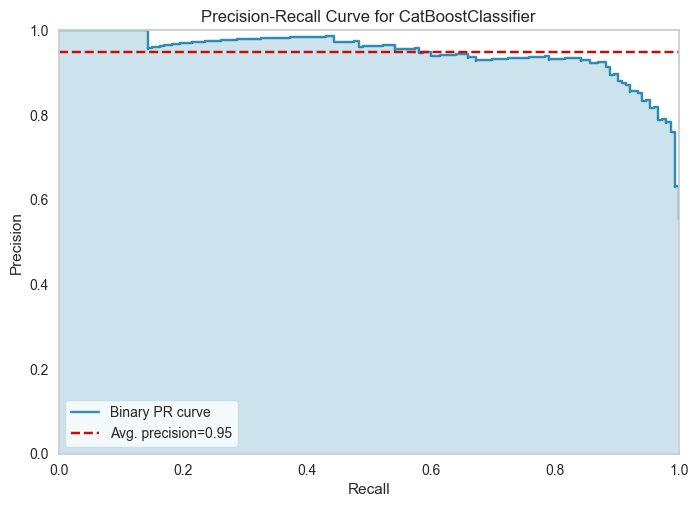

In [16]:
plot_model(best_model, plot="pr")    # Precision-Recall curve


The Precision–Recall curve above for the selected CatBoost classifier demonstrates strong performance across a wide range of recall values, with an average precision of approximately 0.95. The curve maintains high precision even as recall increases, indicating that the model is able to correctly identify heart disease cases while keeping false positives relatively low. This behaviour is particularly important in the presence of class imbalance, where precision–recall analysis provides a more informative assessment than accuracy alone. Overall, the high area under the precision–recall curve confirms that the model achieves a favourable balance between precision and recall, supporting its selection for deployment.

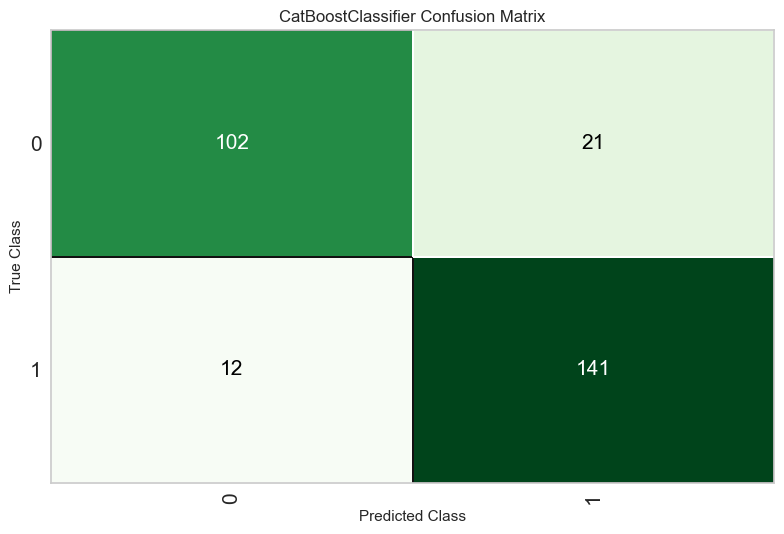

In [17]:
plot_model(best_model, plot="confusion_matrix")  # Confusion matrix

True Positives (141): heart disease cases correctly identified

True Negatives (102): non–heart disease cases correctly identified

False Positives (21): healthy patients incorrectly flagged

False Negatives (12): heart disease cases missed

The confusion matrix above shows the cross-validated classification performance of the CatBoost model during the model comparison stage. Based on 10-fold predictions, the model correctly identifies a large proportion of heart disease cases and non-cases(141 and 102 cases respecitvely), with relatively few false negatives (12 cases). This indicates strong recall and a favourable balance between precision and recall, which aligns with the high F1-score observed during cross-validation. As this matrix reflects training-time cross-validated performance rather than holdout evaluation, it is used to support model selection rather than to assess final generalisation performance.

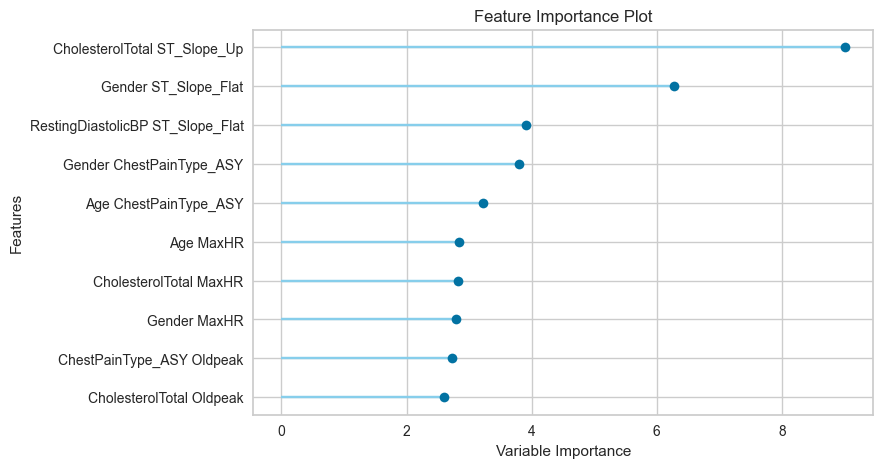

In [18]:
plot_model(best_model, plot="feature")  # Feature importance 

The feature importance plot above highlights the most influential features contributing to the CatBoost model’s predictions after preprocessing and automatic feature engineering. The **most important feature is CholesterolTotal x ST_Slope_Up**, indicating that the effect of cholesterol on heart disease risk is strongly modulated by an upward ST slope pattern. This is **followed by Gender × ST_Slope_Flat**, suggesting that the relationship between gender and heart disease differs depending on a flat ST slope. The **third most important feature, RestingDiastolicBP × ST_Slope_Flat**, further emphasises the role of cardiovascular stress indicators interacting with ECG-derived features. Overall, the dominance of interaction terms demonstrates that heart disease risk is better explained by combinations of clinical and ECG features rather than by individual variables in isolation, validating the use of tree-based ensemble models (such as CatBoost) with automatic feature interaction capabilities.

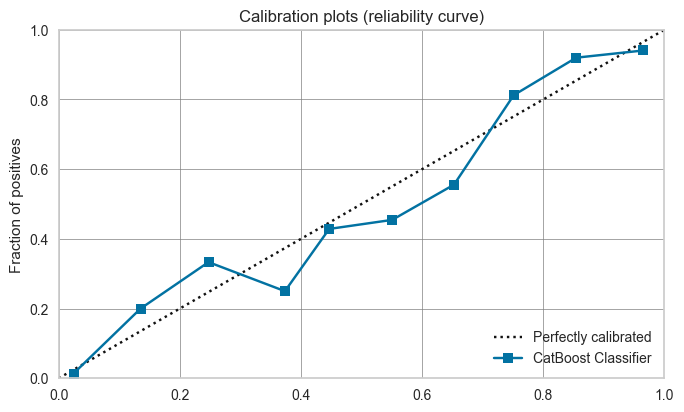

In [19]:
plot_model(best_model, plot="calibration")       # Calibration curve 

The calibration (reliability) plot above evaluates how well the predicted probabilities produced by the CatBoost classifier align with the observed outcomes. The curve closely follows the diagonal reference line, indicating that the model’s predicted risk levels are generally well calibrated. In particular, the model demonstrates strong calibration at higher probability ranges, suggesting that high predicted risk scores correspond well to actual heart disease occurrence. Minor deviations in the mid-probability range indicate slight under- or over-confidence, but overall the model produces reliable probability estimates suitable for risk-based decision making rather than binary classification alone.

## Tuning best model to see if there is even better hyper-parameter values

In [26]:
# Tune the best model across 10-fold
tuned_catboost = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.9464,0.8333,0.8824,0.8571,0.6908,0.6921
1,0.9231,0.9751,0.8889,0.9697,0.9275,0.8459,0.8495
2,0.8281,0.8985,0.8286,0.8529,0.8406,0.6542,0.6545
3,0.7656,0.8562,0.8286,0.7632,0.7945,0.5229,0.5253
4,0.8281,0.9212,0.8571,0.8333,0.8451,0.6522,0.6525
5,0.9062,0.9379,0.9143,0.9143,0.9143,0.8108,0.8108
6,0.8750,0.9054,0.8857,0.8857,0.8857,0.7478,0.7478
7,0.8750,0.9494,0.9444,0.8500,0.8947,0.7419,0.7482
8,0.9375,0.9702,0.9444,0.9444,0.9444,0.8730,0.8730


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2026/01/30 18:38:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


From the above, which is after hyper parameter tuning performed on the CatBoost classifier(best model) using 10-fold cross-validation, the tuned model **did not outperform** the original model in terms of the **primary evaluation metric (F1-score)**. 

While the tuned model achieved a marginal improvement in AUC compared to the original catboost classifier model of 0.9320 vs 0.9296 respectively, it exhibited a lower mean F1-score of 0.8848 compared to the original catboost classifier model of 0.8908 and also higher variability shown from the standard deviation across folds, indicating reduced stability. 

As a result, **the original CatBoost model**, which demonstrated stronger and more consistent performance, was **retained and used as the final model** for prediction on unseen data.

## Using the best final model(original catboost classifier model) to generate predictions on unseen data

In [20]:
# predict on unseen data
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8804,0.9451,0.9216,0.8704,0.8952,0.7563,0.7579


From the above results from the model testing on the unseen data, we can clearly and confidently evaluate, that the comparison, between cross-validated training performance and unseen data performance indicates that the **model generalises well and does not exhibit signs of overfitting**. The F1-score on the unseen dataset (0.8952) is very close to the cross-validated F1-score obtained during training (0.8908), suggesting that the model maintains a similar balance between precision and recall when applied to new data. Likewise, the AUC on unseen data (0.9451) is consistent with the cross-validation AUC (0.9296), demonstrating stable discriminatory ability beyond the training folds. The close alignment of these metrics indicates that the model has learned generalisable patterns rather than memorising the training data, supporting its robustness and suitability for deployment.

In [28]:
# quick check of prediction label and prediction score value
holdout_pred.head()

,Age,Gender,ChestPainType,RestingDiastolicBP,CholesterolTotal,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,prediction_label,prediction_score
633,64,M,TA,110,211,0,LVH,144,Y,1.8,Flat,0,0,0.5443
884,67,M,ASY,160,286,0,LVH,108,Y,1.5,Flat,1,1,0.9906
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0,0,0.9502
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0,0,0.9784
143,53,M,ASY,140,243,0,Normal,155,N,0.0,Up,0,0,0.7629


Predictions on unseen data were generated using PyCaret’s **predict_model()** function, which automatically evaluates the final model on the holdout test set created during the initial setup. This holdout dataset was not used during training or cross-validation, ensuring an unbiased evaluation of model generalisation performance. As such, no additional data preparation or removal of the target variable was required for this step. Predictions on external datasets would only require explicit removal of the target column, which was not necessary for the holdout evaluation in this experiment.

For holdout evaluation, the target variable was retained in the dataset, as PyCaret automatically excludes it from feature inputs while using it to compute evaluation metrics. This allows accurate assessment of model performance on unseen data without affecting prediction scores. Removal of the target variable is only required when generating predictions on external or real-world datasets where true labels are not available.

In [40]:
# average prediction score of 300 rows
holdout_300 = holdout_pred.head(300).copy()
avg_prediction_score = holdout_300["prediction_score"].mean()
avg_prediction_score

0.8806630434782609

The above value shows the average prediction_score the model has on 300 heart disease records. It shows a very high prediction score of 0.881, which shows that the model is good and is able to predict well.

In [42]:
# error rate of 300 rows
holdout_300["error_flag"] = (
    holdout_300["HeartDisease"] != holdout_300["prediction_label"]
).astype(int)
error_count = holdout_300["error_flag"].sum()
error_rate = holdout_300["error_flag"].mean()  # proportion

error_rate_pct = error_rate * 100
print("Error Percentage rate: " + (f"{error_rate_pct:.2f}") +"%")


Error Percentage rate: 11.96%


An error rate of approximately 11.96% on 300 unseen heart disease records indicates strong predictive performance for a real-world clinical classification task. Medical datasets are inherently noisy and involve overlapping risk profiles, making perfect classification unrealistic. Achieving close to 88% correct predictions demonstrates that the model captures meaningful clinical patterns rather than random correlations. Furthermore, the low error rate is consistent with the model’s high F1-score and AUC, suggesting a well-balanced trade-off between false positives and false negatives and reinforcing the model’s robustness and generalisation capability.

## Save entire pipeline

In [24]:
# save pipeline 
save_model(best_model, 'heart_disease_pipeline_bren')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'RestingDiastolicBP',
                                              'CholesterolTotal', 'FastingBS',
                                              'MaxHR', 'Oldpeak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='median'))),
                 ('categorical_imputer',
                  Trans...
                                              'RestingDiastolicBP', 'Oldpeak'],
     

## Experiment logging

In [12]:
!mlflow ui
# open localhost:5000 in browser

^C


## Register the model with MLFlow

In [13]:
# Load my saved Pycaret pipeline as my jupyter notebook resetted
from pycaret.classification import load_model

# Load the saved pipeline
final_model = load_model("heart_disease_pipeline_bren")


Transformation Pipeline and Model Successfully Loaded


In [14]:
import mlflow
# Point MLflow to the correct tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Heart_Disease_Prediction")


<Experiment: artifact_location='file:///C:/Users/bel_l/Documents/MLOps/MLOPS%20Assignment/mlruns/261358796427204515', creation_time=1769766946635, experiment_id='261358796427204515', last_update_time=1769766946635, lifecycle_stage='active', name='Heart_Disease_Prediction', tags={}>

In [15]:
import mlflow.sklearn

with mlflow.start_run(run_name="final_catboost_model"):
    mlflow.sklearn.log_model(
        sk_model=final_model,
        artifact_path="model",
        registered_model_name="Heart_Disease_Prediction_Model"
    )


2026/02/05 22:53:21 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-08-29; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'backports-zstd'}
2026/02/05 22:53:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Heart_Disease_Prediction_Model'.
2026/02/05 22:53:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Heart_Disease_Prediction_Model, version 1
Created version '1' of model 'Heart_Disease_Prediction_Model'.
2026/02/05 22:53:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run final_catboost_model at: http://127.0.0.1:5000/#/experiments/261358796427204515/runs/94b43875a6284d8289d4dd9bad0d2492.
2026/0